#### 2)

设定 $\alpha_0 = 0.002,~ \alpha_1 = 0.25,~ \beta_1 = 0.35 ,~ h_1 = 0.05,~ d = 4$，生成样本量为 $1000$ 的服从上述 $\text{GARCH(1,~1)}$过程的序列，并画图。

$\text{Solution.}$

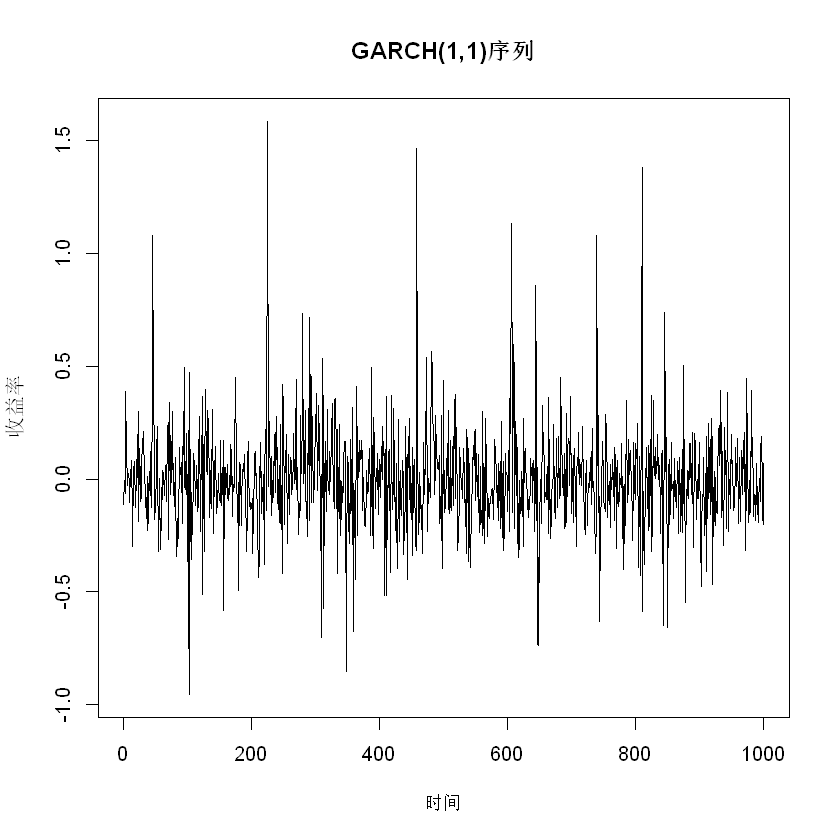

In [16]:
# 设置参数
set.seed(123)  # 随机种子确保可重复性
n <- 1000      # 样本量
alpha0 <- 0.02
alpha1 <- 0.25
beta1 <- 0.35
h1 <- 0.05
d <- 4         # t分布自由度

# 初始化序列
h <- numeric(n)
r <- numeric(n)
h[1] <- h1
r[1] <- sqrt(h1) * rt(1, df = d) / sqrt(d / (d - 2))

set.seed(114514)
# 生成GARCH(1,1)序列
for (t in 2:n) {
  h[t] <- alpha0 + beta1 * h[t - 1] + alpha1 * r[t - 1]^2
  r[t] <- sqrt(h[t]) * rt(1, df = d) / sqrt(d / (d - 2))
}

# 绘制时间序列图
plot.ts(r, main = "GARCH(1,1)序列", xlab = "时间", ylab = "收益率", col = "black")

#### 3) 

基于上面这个样本，写一个`R`程序找到 $\theta$ 的 $\text{MLE}$ 和相应的标准差。

$\text{Solution.}$

本题中$\theta = (\alpha_0 , \alpha_1,~ \beta_1)$，可对序列作如下处理：

In [17]:
library(tseries)

g1 = garch(r, order = c(1, 1))
summary(g1)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     4.752933e-02     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -9.824e+02
     1    5 -9.829e+02  5.13e-04  8.59e-04  1.9e-02  1.9e+05  2.1e-03  8.20e+01
     2    8 -9.876e+02  4.69e-03  5.53e-03  2.5e-01  5.3e+00  3.4e-02  2.14e+01
     3   12 -9.878e+02  2.18e-04  1.57e-03  2.8e-02  2.3e+00  4.9e-03  5.29e+00
     4   13 -9.888e+02  1.08e-03  1.18e-03  2.0e-02  2.0e+00  4.9e-03  3.00e+00
     5   17 -1.000e+03  1.15e-02  1.41e-02  3.4e-01  2.0e+00  1.3e-01  2.92e+00
     6   18 -1.005e+03  4.55e-03  8.15e-03  3.1e-01  2.0e+00  1.3e-01  2.08e+00
     7   19 -1.008e+03  3.09e-03  8.70e-03  1.9e-01  2.0e+00  1.3e-01  1.84e+00
     8   21 -1.009e+03  5.78e-04  5.99e-03  6.1e-02  2.0e+00  5.2e-02  9.63e-02
     9   22 -1.011e+03  2.16e-03  2.04e-03  3.0e-02 


Call:
garch(x = r, order = c(1, 1))

Model:
GARCH(1,1)

Residuals:
     Min       1Q   Median       3Q      Max 
-4.55328 -0.59210 -0.02266  0.48529  7.62490 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0  0.019710    0.003095    6.368 1.91e-10 ***
a1  0.319647    0.035416    9.025  < 2e-16 ***
b1  0.355432    0.072466    4.905 9.35e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 1621.6, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 0.64252, df = 1, p-value = 0.4228


则：
- $\hat{\theta}_{MLE} = (\hat{\alpha_0},~ \hat{\alpha_1},~ \hat{\beta_1}) = (0.0197,~ 0.3196,~ 0.3554)$。三个系数的拟合结果都是显著的。
- 相应的标准差分别为：$\hat{\sigma}_{\alpha_0} = 0.0031,~ \hat{\sigma}_{\alpha_1} = 0.0354,~ \hat{\sigma}_{\beta_1} = 0.0725$。